# TP3: Geometric Camera Calibration of a Smartphone

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


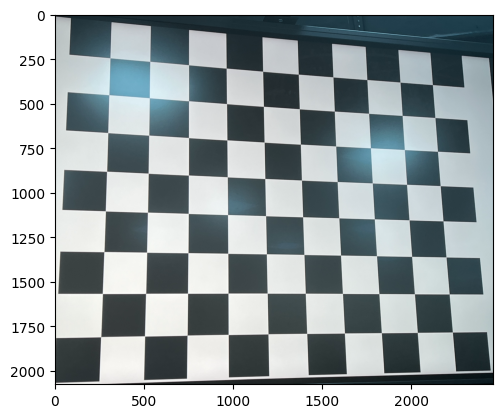

In [8]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
imq = cv2.imread('/content/drive/MyDrive/SLAM/chessboards1/IMG_4566.JPG')
plt.imshow(imq)

In [3]:
!ls /content/drive/MyDrive/SLAM/chessboards0


IMG_4536.JPG  IMG_4543.JPG  IMG_4550.JPG  IMG_4557.JPG	IMG_4564.JPG
IMG_4537.JPG  IMG_4544.JPG  IMG_4551.JPG  IMG_4558.JPG	IMG_4565.JPG
IMG_4538.JPG  IMG_4545.JPG  IMG_4552.JPG  IMG_4559.JPG	IMG_4566.JPG
IMG_4539.JPG  IMG_4546.JPG  IMG_4553.JPG  IMG_4560.JPG	IMG_4567.JPG
IMG_4540.JPG  IMG_4547.JPG  IMG_4554.JPG  IMG_4561.JPG	IMG_4568.JPG
IMG_4541.JPG  IMG_4548.JPG  IMG_4555.JPG  IMG_4562.JPG	IMG_4569.JPG
IMG_4542.JPG  IMG_4549.JPG  IMG_4556.JPG  IMG_4563.JPG


In [12]:
import cv2
import numpy as np
import glob

# Checkerboard dimensions ( internal corners )
dims = (9 , 6)
objp = np.zeros (( dims [0]* dims [1] , 3) , np.float32 )
objp [: ,:2] = np.mgrid [0: dims [0] , 0: dims [1]].T.reshape ( -1 ,2)
objpoints = [] # 3 d points in real world space
imgpoints = [] # 2 d points in image plane

image_folder = '/content/drive/MyDrive/SLAM/chessboards0/'
images = glob.glob(image_folder + '*.JPG')  # Prendre toutes les images .jpg

# Placeholder for gray_shape. It will be updated for each image that finds a chessboard.
gray_shape = None

for fname in images :
  img = cv2.imread( fname )
  if img is None: # Check if image was loaded successfully
    print(f"Warning: Could not read image: {fname}")
    continue # Skip to the next image
  gray = cv2.cvtColor( img , cv2.COLOR_BGR2GRAY )
  ret , corners = cv2.findChessboardCorners( gray , dims , None )
  if ret : # Corrected indentation
    objpoints.append( objp )
    imgpoints.append( corners )
    gray_shape = gray.shape[::-1] # Store gray_shape for calibration




# Calibrate only if chessboard corners were found in at least one image
if objpoints and imgpoints and gray_shape:
  ret , mtx , dist , rvecs , tvecs = cv2.calibrateCamera ( objpoints , imgpoints ,
  gray_shape , None , None )
  print ( " Intrinsic Matrix K :\n " , mtx ) # Corrected SyntaxWarning: \ n -> \n
else:
  print("No chessboard corners found in any image, or images list was empty. Calibration not performed.")

 Intrinsic Matrix K :
  [[4.03886365e+03 0.00000000e+00 1.34099768e+03]
 [0.00000000e+00 3.60075694e+03 1.97145017e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


La matrice intrinsèque présentée montre une structure mathématiquement correcte, avec des focales. Toutefois, les valeurs obtenues soulèvent plusieurs incohérences au regard du matériel utilisé et des conditions de calibration. En particulier, l’écart significatif entre fx=4039 et fy=3601 est inhabituel pour une caméra de smartphone, dont les pixels sont quasi carrés, et suggère une estimation imprécise des paramètres intrinsèques.

Le damier utilisé pour la calibration a été simplifié en réduisant le nombre de cases, afin de faciliter la détection automatique des coins. Même avec cette simplification, avec 34 images disponibles, il y a seulement une seule qui est correctement détecté. En conséquence, la matrice de calibration obtenue est imprécise, ce qui se traduit par une augmentation de l’erreur de reprojection et par des erreurs systématiques dans l’estimation de la profondeur et de la pose de la caméra.